# Linear Regression for Time Series Data

This notebook explores the application of linear regression to time series data. 

## Key Differences for Time Series

When working with time series data, there are a few additional steps required:

- **Reshaping the data**: Time series data often needs to be restructured to fit the input format expected by regression models
- **Using time as index**: Setting temporal values as the index helps maintain chronological ordering

## Process

The rest of the modeling process remains the same as standard linear regression:
1. Feature preparation
2. Model training
3. Prediction
4. Evaluation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split


In [3]:
# load data
df = pd.read_csv("otp_time_series_web.csv")
print(df.info())
print("====="*5)
print(df.describe())
print("====="*5)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108742 entries, 0 to 108741
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Route               108742 non-null  object 
 1   Departing_Port      108742 non-null  object 
 2   Arriving_Port       108742 non-null  object 
 3   Airline             108742 non-null  object 
 4   Month               108742 non-null  object 
 5   Sectors_Scheduled   108742 non-null  float64
 6   Sectors_Flown       108742 non-null  int64  
 7   Cancellations       108426 non-null  float64
 8   Departures_On_Time  108742 non-null  float64
 9   Arrivals_On_Time    108742 non-null  float64
 10  Departures_Delayed  108737 non-null  float64
 11  Arrivals_Delayed    108742 non-null  float64
 12  Year                108742 non-null  int64  
 13  Month_Num           108742 non-null  int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 11.6+ MB
None
       Sectors_Schedu

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Adelaide-Brisbane,Adelaide,Brisbane,All Airlines,Jan-04,155.0,155,0.0,123.0,120.0,32.0,35.0,2004,1
1,Adelaide-Canberra,Adelaide,Canberra,All Airlines,Jan-04,75.0,75,0.0,72.0,72.0,3.0,3.0,2004,1
2,Adelaide-Gold Coast,Adelaide,Gold Coast,All Airlines,Jan-04,40.0,40,0.0,36.0,35.0,4.0,5.0,2004,1
3,Adelaide-Melbourne,Adelaide,Melbourne,All Airlines,Jan-04,550.0,548,2.0,478.0,487.0,70.0,61.0,2004,1
4,Adelaide-Perth,Adelaide,Perth,All Airlines,Jan-04,191.0,191,0.0,169.0,168.0,22.0,23.0,2004,1


In [4]:
# convert the Month column to datetime
df["Month"] = pd.to_datetime(df["Month"], format="%b-%y")
print(df["Month"].head())
# Filter the data

df_all_airlines = df[df["Airline"] == "All Airlines"]


# Group by month and aggregate with the sum.
# Keep columns "Cancellations", "Arrivals_Delayed", and "Sectors_Scheduled".
df_per_month = df_all_airlines.groupby("Month")[[
    "Cancellations", "Arrivals_Delayed", "Sectors_Scheduled"]].sum()

df_per_month.head()

0   2004-01-01
1   2004-01-01
2   2004-01-01
3   2004-01-01
4   2004-01-01
Name: Month, dtype: datetime64[ns]


,Cancellations,Arrivals_Delayed,Sectors_Scheduled
Month,,,
2004-01-01,367.0,6996.0,54081.0
2004-02-01,311.0,5166.0,52325.0
2004-03-01,394.0,4768.0,57215.0
2004-04-01,385.0,5429.0,55555.0
2004-05-01,479.0,4540.0,58430.0


<Axes: xlabel='Month', ylabel='Arrivals_Delayed'>

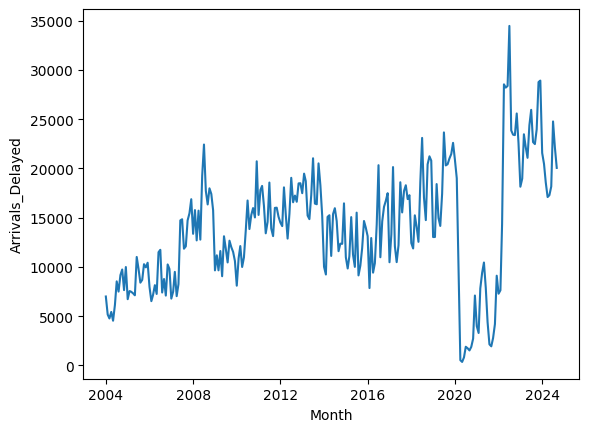

In [5]:
sns.lineplot(df_per_month["Arrivals_Delayed"])

## Observation
During pendamic world wide flights decreased there for we see decline in delays as they sample was smaller

<Axes: xlabel='Month'>

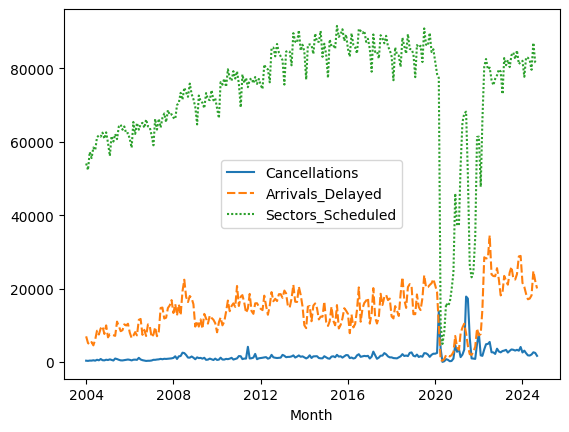

In [6]:
sns.lineplot(df_per_month[["Cancellations", "Arrivals_Delayed", "Sectors_Scheduled"]])

<Axes: xlabel='Month', ylabel='Arrivals_Delayed'>

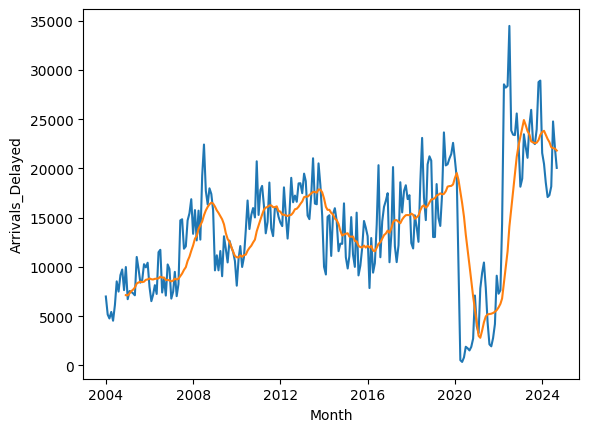

In [7]:
# lets smooth the data using rolling average
delays_moving_average = df_per_month["Arrivals_Delayed"].rolling(window=12).mean() 

# Plot the original data
sns.lineplot(df_per_month["Arrivals_Delayed"])

# plot the moving average
sns.lineplot(delays_moving_average)

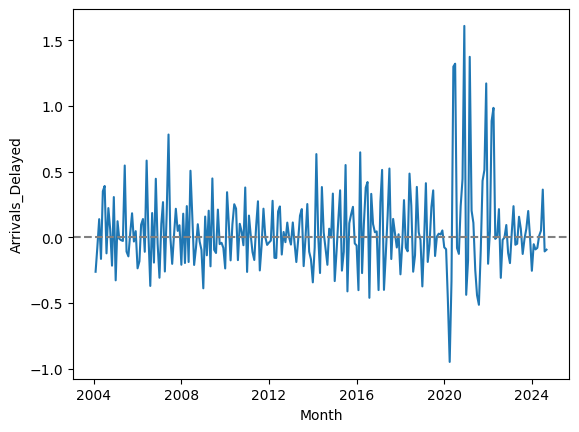

In [8]:
# Lets further analyze the data and understand the percentage of delayed flights
cancel_pct_change = df_per_month["Arrivals_Delayed"].pct_change()

# plot the result
sns.lineplot(cancel_pct_change)

# Add a horizontal line at y=0
plt.axhline(y=0, color='grey', linestyle='--', label="y=0")

**Observation**: Covid had significant impact on flights. It was an extremely rare case therefore we can filter it out

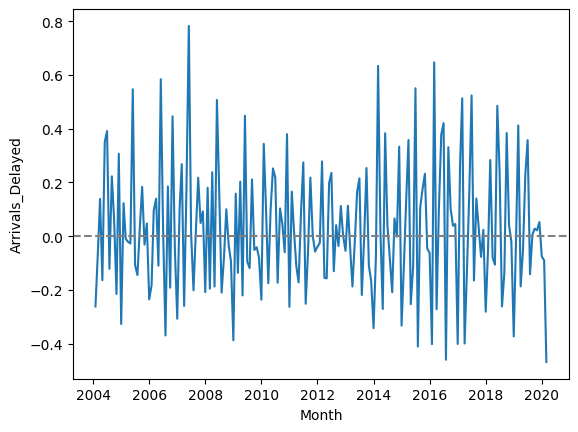

In [ ]:
cancel_pct_change_filtered = cancel_pct_change[:"2020-03-01"]

sns.lineplot(cancel_pct_change_filtered)

# Add a horizontal line at y=0
plt.axhline(y=0, color='grey', linestyle='--', label="y=0")

In [10]:
df_per_month[cancel_pct_change>0.5]

,Cancellations,Arrivals_Delayed,Sectors_Scheduled
Month,,,
2005-06-01,808.0,11009.0,60709.0
2006-06-01,1144.0,11492.0,63291.0
2007-06-01,861.0,14720.0,63865.0
2008-06-01,2543.0,19240.0,71459.0
2014-03-01,1230.0,15077.0,86346.0
2015-07-01,1958.0,15508.0,91548.0
2016-03-01,1226.0,12930.0,89549.0
2017-03-01,2835.0,20134.0,89219.0
2017-07-01,1724.0,18592.0,89022.0


## Now Lets perform some linear regression using this time sereies data

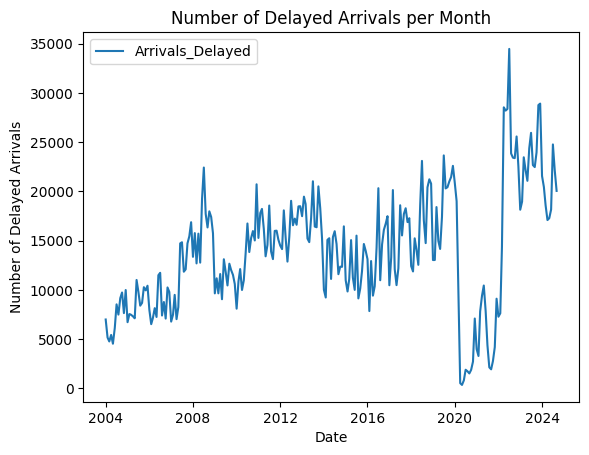

In [ ]:
df_a = df_per_month.loc[:, ['Arrivals_Delayed']]

sns.lineplot(df_a)

plt.ylabel("Number of Delayed Arrivals")
plt.xlabel("Date")

plt.title("Number of Delayed Arrivals per Month")

plt.show()

In [15]:
# lets create idx column
df_a["idx"] = range(len(df_a))

predictor = ["idx"]

X = sm.add_constant(df_a[predictor])

Y = df_a["Arrivals_Delayed"]

model = sm.OLS(Y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Arrivals_Delayed   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     44.63
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           1.57e-10
Time:                        18:15:16   Log-Likelihood:                -2499.1
No. Observations:                 249   AIC:                             5002.
Df Residuals:                     247   BIC:                             5009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9841.7016    701.505     14.029      0.0

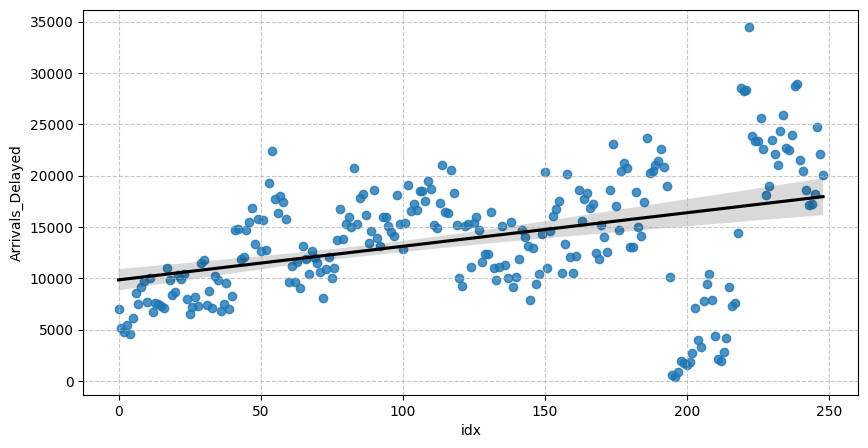

In [ ]:
plt.figure(figsize=(10, 5))
sns.regplot(x=df_a[predictor], y=Y, line_kws={'color': 'black'})

# add grid
plt.grid(alpha=0.7, linestyle="--")

plt.show()

In [20]:
df_a["Season"] = df_a.index.quarter

predictors = ["idx", "Season"]

X_seasonal = sm.add_constant(df_a[predictors])

model_seasonal = sm.OLS(Y,X_seasonal)
results_seasonal = model_seasonal.fit()

# print the summary
print(results_seasonal.summary())

                            OLS Regression Results                            
Dep. Variable:       Arrivals_Delayed   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     28.20
Date:                Sun, 23 Nov 2025   Prob (F-statistic):           9.41e-12
Time:                        18:22:48   Log-Likelihood:                -2494.1
No. Observations:                 249   AIC:                             4994.
Df Residuals:                     246   BIC:                             5005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7425.2198   1025.464      7.241      0.0

### Now lets check how well the model predicts 


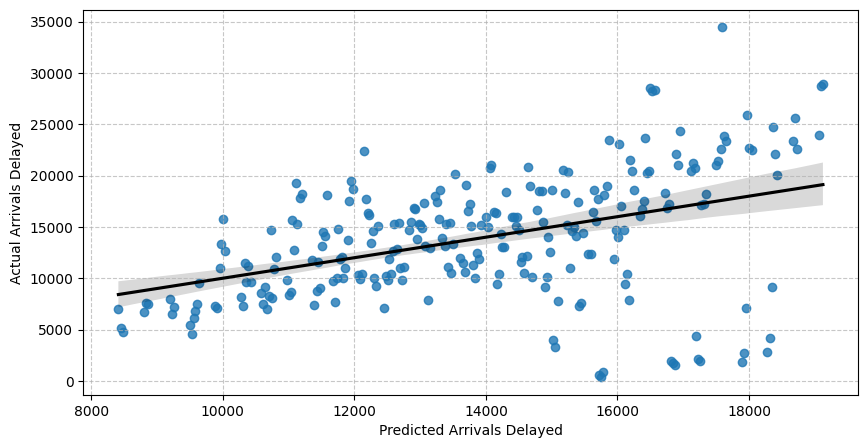

In [21]:
plt.figure(figsize=(10, 5))

y_pred = results_seasonal.predict(X_seasonal)

#  regression plot
sns.regplot(x=y_pred, y=Y, line_kws={'color': 'black'})

# labels
plt.xlabel("Predicted Arrivals Delayed")
plt.ylabel("Actual Arrivals Delayed")

plt.grid(alpha=0.7, linestyle="--")

plt.show()

In [24]:
residuals = Y - y_pred

MAE = residuals.abs().mean()
mean = Y.mean()
max, min = (Y.max() , Y.min())
print("Mean of Actual Values:", mean)
print("Data Range: ", min, " to ", max)
print("Mean Absolute Error:", MAE)

Mean of Actual Values: 13896.20285437992
Data Range:  355.0  to  34461.0
Mean Absolute Error: 3974.057910265702


## Conlusion

I think the the normal date and quaterly based idx doesnt fit well due to the R-square rating